In [1]:
import os
import tarfile ##알아보기 
import urllib
# import pandas as pd
import numpy as np
import pandas as pd

# DOWNLOAD_ROOT = "https://github.com/rickiepark/handson-ml2/tree/master/datasets/housing"
# HOUSING_PATH = os.path.join('datasets','housing')
# HOUSING_URL= DOWNLOAD_ROOT + 'datesets/housing/housing/tgz'
housing = pd.read_csv('/home/aiffel042/Dropbox/aiffel/fundamentals/dataset/housing/housing.csv')

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing2 = housing.fillna(-1)
housing2['ocean_proximity'].value_counts()
# housing2['ocean_proximity'].unique()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing2['ocean_proximity'].value_counts()
housing2['ocean_proximity'] = housing2['ocean_proximity'].replace({'NEAR BAY':0, '<1H OCEAN':1, 'INLAND':2, 'NEAR OCEAN':3, 'ISLAND':4})
#replace는 dic를 좋아해요. 이렇게 변경해요. 

In [6]:
housing2['ocean_proximity'].value_counts()

1    9136
2    6551
3    2658
0    2290
4       5
Name: ocean_proximity, dtype: int64

In [7]:
housing2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.466182,1425.476744,499.539680,3.870671,206855.816909,1.464729
std,2.003532,2.135952,12.585558,2181.615252,422.690979,1132.462122,382.329753,1.899822,115395.615874,0.854226
min,-124.350000,32.540000,1.000000,2.000000,-1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


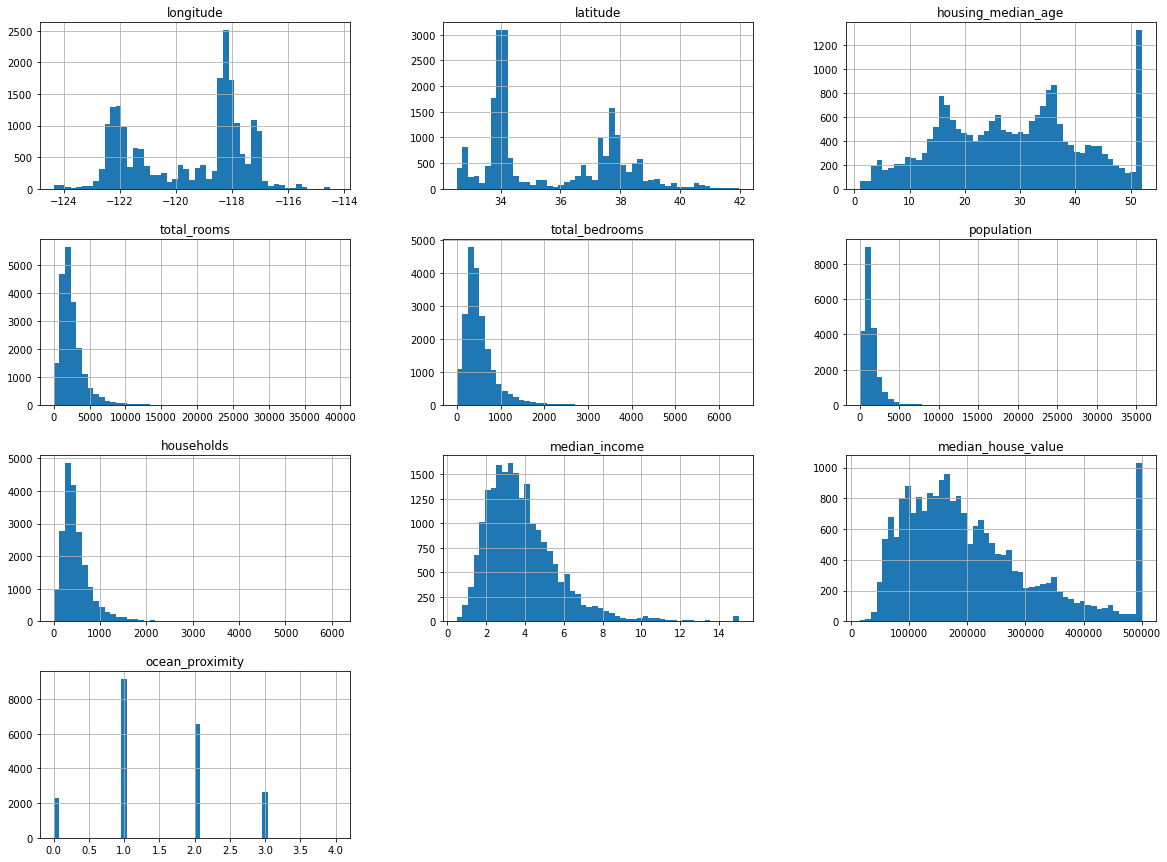

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing2.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     os.makedirs(housing_path, exist_ok=Ture)
#     tgz_path = os.path(housing_path,'housing_tgz')
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()

In [10]:
# def load_housing_Data(housing_path=HOUSING_PATH):
#     csv_path =os.path.join(housing_path,'housing.csv')
#     return pd.read_csv(csv_path)

In [11]:
# housing = load_housing_Data()
# housing.head()

In [12]:
import numpy as np 
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing2, 0.2)
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
housing_with_id = housing2.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [17]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing2, test_size =0.2, random_state =42)

In [19]:
housing2 = housing2.reset_index()

In [20]:
housing2

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [21]:
housing2['income_cat'] = pd.cut(housing2['median_income'], 
                               bins=[0.,1.5,3.0,4.5,6.0,np.inf],
                               labels=[1,2,3,4,5])

In [22]:
housing2['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

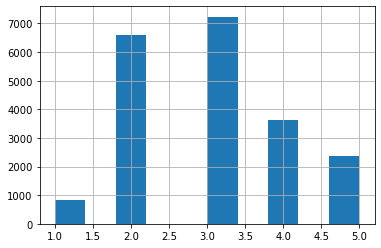

In [23]:
housing2['income_cat'].hist()
plt.show()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing2, housing2['income_cat']):
    strat_train_set = housing2.loc[train_index]
    strat_test_set = housing2.loc[test_index]

In [25]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [26]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace=True)

In [27]:
housing2 = strat_train_set.copy()

### 데이터 이해를 위한 탐색과 시각화 

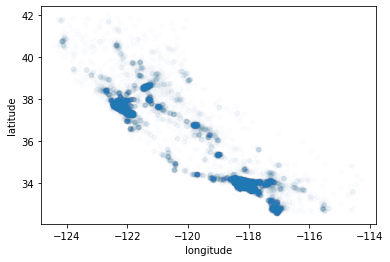

In [28]:
housing2.plot(kind='scatter', x ='longitude', y = 'latitude', alpha=0.01)
plt.show()

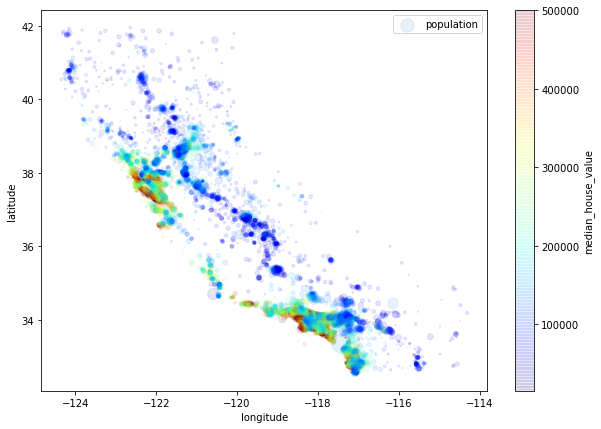

In [29]:
housing2.plot(kind ='scatter', x ='longitude', y='latitude',alpha=0.1, s=housing2['population']/100, label='population', figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend()

In [30]:
housing2.columns

Index(['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [31]:
corr_matrix = housing.corr()

In [32]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [33]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

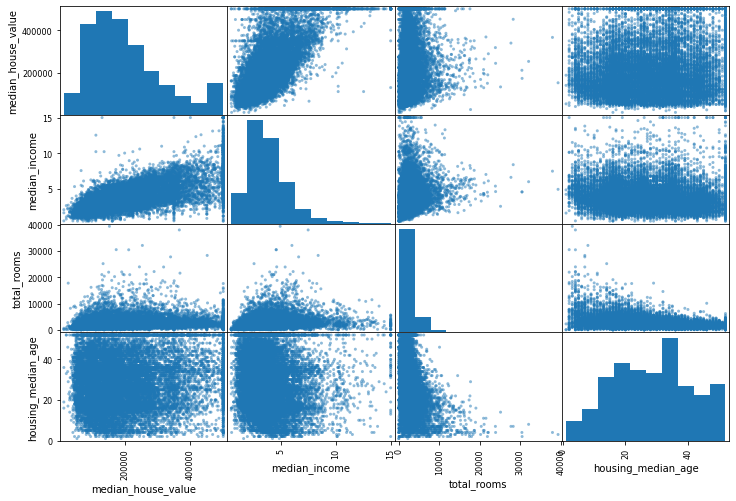

In [34]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing2[attributes], figsize=(12,8))
plt.show()


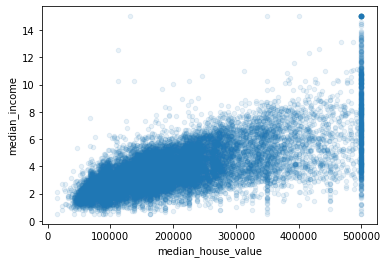

In [35]:
housing2.plot(kind='scatter', x ='median_house_value',y ='median_income', alpha = 0.1)

In [36]:
housing2['rooms_per_household'] = housing2['total_rooms']/housing2['households']
housing2['bedrooms_per_room'] = housing2['total_bedrooms']/housing2['total_rooms']
housing2['population_per_household'] = housing2['population']/housing2['households']

In [37]:
corr_matrix = housing2.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
index                       0.067723
households                  0.064506
total_bedrooms              0.047963
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
ocean_proximity            -0.213664
bedrooms_per_room          -0.240975
Name: median_house_value, dtype: float64

In [38]:
housing2 = strat_train_set.drop('median_house_value', axis = 1)
housing_label = strat_train_set['median_house_value'].copy()

In [39]:
housing2

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1
18632,18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,1
14650,14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,3
3230,3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2
3555,3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1
...,...,...,...,...,...,...,...,...,...,...
6563,6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,2
12053,12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2
13908,13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,2
11159,11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,1


In [40]:
housing_label

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [41]:
housing_label.describe()

count     16512.000000
mean     206990.920724
std      115703.014830
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
# housing_num = housing.drop(columns =['ocean_proximity'])


In [43]:
imputer.fit(housing2)

SimpleImputer(strategy='median')

In [44]:
imputer.statistics_

array([ 1.0341e+04, -1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1195e+03,
        4.2900e+02,  1.1640e+03,  4.0800e+02,  3.5409e+00,  1.0000e+00])

In [45]:
housing2.median().values

array([ 1.0341e+04, -1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1195e+03,
        4.2900e+02,  1.1640e+03,  4.0800e+02,  3.5409e+00,  1.0000e+00])

In [46]:
housing2.columns

Index(['index', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [47]:
housing3 = imputer.transform(housing2)


In [48]:
housing_tr = pd.DataFrame(housing3, columns=housing2.columns,
                         index=housing2.index)
housing_tr

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,17606.0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1.0
18632,18632.0,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,1.0
14650,14650.0,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,3.0
3230,3230.0,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
3555,3555.0,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1.0
...,...,...,...,...,...,...,...,...,...,...
6563,6563.0,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,2.0
12053,12053.0,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,2.0
13908,13908.0,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,2.0
11159,11159.0,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,1.0


In [49]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [50]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [51]:
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [52]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [55]:
from sklearn.preprocessing import OneHotEncoder
cat_encorder = OneHotEncoder()
housing_cat_1hot = cat_encorder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

### 원핫인코딩 
개념: 해당내용이 있으면 1, 없으면 0으로 분류
    
사용이유: 카테고리컬한 데이터를 숫자형으로 변환한다면 숫자가 가깝다고 예를들면 1,0 과 1,4의 데이터가 있다하면 1,0데이터가, 1,4만큼 더 밀접한 건 아니기에
    
원핫인코딩은 카테고리가 수천개인 데이터를 만들때 좋아요. 

원핫인코딩은 희소행렬(sparse matrix)로 나타나는데 희소행렬은 수천개의 카테고리가 있는 범주형일때 효율적입니다. 
왜냐면 


In [56]:
housing_cat_1hot.toarray() #희소행렬을 csr방식으로 저장해줌 > 왜냐면 메모리가 많이 사용됩니다. 

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [57]:
cat_encorder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X):
        rooms_per_household = X